In [22]:
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
sys.path.insert(0, "..")
import src.utils.dtw as dtw
import numpy as np
from tqdm import tqdm
from scipy.interpolate import interp1d
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import check_random_state

In [24]:
timeSeries = pd.read_json('../data/processed/realData.json', orient='records', lines=True)

# Filtrar las series de tiempo por clase
healthy_cop_x = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_cop_x = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_cop_x = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

healthy_cop_y = timeSeries[timeSeries['class'] == 'Healthy']['cop_y']
neuropathic_cop_y = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_y']
diabetic_cop_y = timeSeries[timeSeries['class'] == 'Diabetic']['cop_y']

# Convertir las listas de coordenadas en arrays numpy
healthy_cop_x = np.array([np.array(series) for series in healthy_cop_x])
neuropathic_cop_x = np.array([np.array(series) for series in neuropathic_cop_x])
diabetic_cop_x = np.array([np.array(series) for series in diabetic_cop_x])

healthy_cop_y = np.array([np.array(series) for series in healthy_cop_y])
neuropathic_cop_y = np.array([np.array(series) for series in neuropathic_cop_y])
diabetic_cop_y = np.array([np.array(series) for series in diabetic_cop_y])


C:\Users\nicol\AppData\Local\Temp\ipykernel_21312\1963648703.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=87).
  plt.specgram(healthy_cop_x, Fs=1)  # Fs es la frecuencia de muestreo. Ajusta según tus datos.


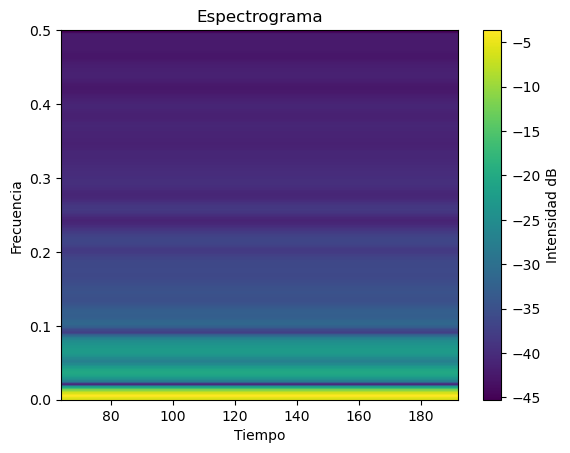

In [25]:
plt.specgram(healthy_cop_x, Fs=1)  # Fs es la frecuencia de muestreo. Ajusta según tus datos.

# Agrega títulos y etiquetas
plt.title("Espectrograma")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")

# Muestra el espectrograma
plt.colorbar(label='Intensidad dB')
plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_21312\1446226709.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=145).
  plt.specgram(diabetic_cop_x, Fs=1)  # Fs es la frecuencia de muestreo. Ajusta según tus datos.


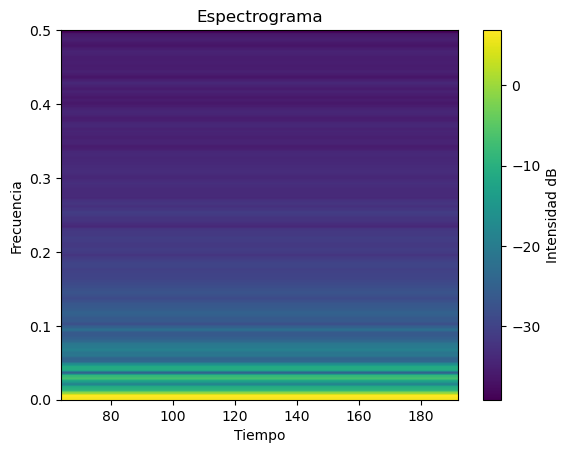

In [26]:
plt.specgram(diabetic_cop_x, Fs=1)  # Fs es la frecuencia de muestreo. Ajusta según tus datos.

# Agrega títulos y etiquetas
plt.title("Espectrograma")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")

# Muestra el espectrograma
plt.colorbar(label='Intensidad dB')
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_21312\2697403636.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=201).
  plt.specgram(neuropathic_cop_x, Fs=1)  # Fs es la frecuencia de muestreo. Ajusta según tus datos.


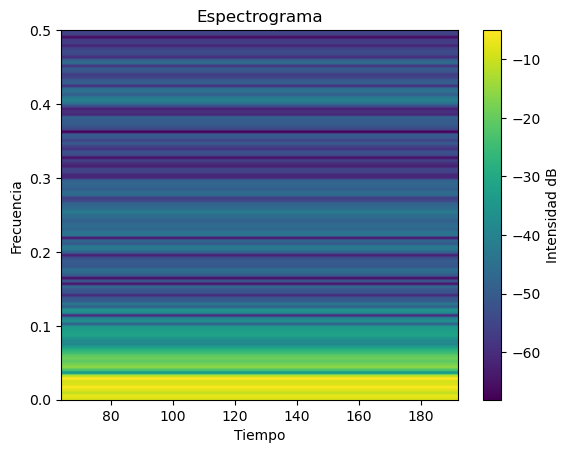

In [27]:
plt.specgram(neuropathic_cop_x, Fs=1)  # Fs es la frecuencia de muestreo. Ajusta según tus datos.

# Agrega títulos y etiquetas
plt.title("Espectrograma")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")

# Muestra el espectrograma
plt.colorbar(label='Intensidad dB')
plt.show()

In [ ]:
# Cargar los datos desde el archivo JSON
timeSeries = pd.read_json('../data/processed/realData.json', orient='records', lines=True)

# Filtrar las series de tiempo por clase
healthy_cop_x = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_cop_x = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_cop_x = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

healthy_cop_y = timeSeries[timeSeries['class'] == 'Healthy']['cop_y']
neuropathic_cop_y = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_y']
diabetic_cop_y = timeSeries[timeSeries['class'] == 'Diabetic']['cop_y']

# Convertir las listas de coordenadas en arrays numpy
healthy_cop_x = np.array([np.array(series) for series in healthy_cop_x])
neuropathic_cop_x = np.array([np.array(series) for series in neuropathic_cop_x])
diabetic_cop_x = np.array([np.array(series) for series in diabetic_cop_x])

healthy_cop_y = np.array([np.array(series) for series in healthy_cop_y])
neuropathic_cop_y = np.array([np.array(series) for series in neuropathic_cop_y])
diabetic_cop_y = np.array([np.array(series) for series in diabetic_cop_y])

# Asegurarse de que las etiquetas sean numéricas
label_map = {'Healthy': 0, 'Diabetic': 1, 'Neuropathic': 2}
y = timeSeries['class'].map(label_map).values

# Asegurarse de que las series de tiempo tengan la forma (n_samples, n_timestamps, n_features)
if healthy_cop_x.ndim == 2:
    healthy_cop_x = np.expand_dims(healthy_cop_x, axis=2)
if neuropathic_cop_x.ndim == 2:
    neuropathic_cop_x = np.expand_dims(neuropathic_cop_x, axis=2)
if diabetic_cop_x.ndim == 2:
    diabetic_cop_x = np.expand_dims(diabetic_cop_x, axis=2)

if healthy_cop_y.ndim == 2:
    healthy_cop_y = np.expand_dims(healthy_cop_y, axis=2)
if neuropathic_cop_y.ndim == 2:
    neuropathic_cop_y = np.expand_dims(neuropathic_cop_y, axis=2)
if diabetic_cop_y.ndim == 2:
    diabetic_cop_y = np.expand_dims(diabetic_cop_y, axis=2)

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.interpolate import interp1d
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.utils import check_random_state

# Función para añadir ruido gaussiano
def jitter(x, sigma=0.03):
    return x + np.random.normal(loc=0., scale=sigma, size=x.shape)

# Función para generar datos aumentados con DTW y mezcla
def spawner(x, labels, num_samples, sigma=0.05, verbose=0, random_state=None):
    random_state = check_random_state(random_state)
    n_samples = x.shape[0]
    n_timestamps = x.shape[1]
    n_features = x.shape[2]
    orig_steps = np.arange(n_timestamps)
    l = np.argmax(labels, axis=1) if labels.ndim > 1 else labels
    
    ret = np.zeros((num_samples, n_timestamps, n_features))
    
    for i in tqdm(range(num_samples)):
        idx = random_state.randint(n_samples)
        random_points = np.random.randint(low=1, high=n_timestamps - 1, size=1)[0]
        window = np.ceil(n_timestamps / 10.).astype(int)
        choices = np.delete(np.arange(n_samples), idx)
        choices = np.where(l[choices] == l[idx])[0]
        
        if choices.size > 0:
            random_sample = x[np.random.choice(choices)]
            path1 = dtw.dtw(x[idx][:random_points], random_sample[:random_points], return_flag=dtw.RETURN_PATH, slope_constraint="symmetric", window=window)
            path2 = dtw.dtw(x[idx][random_points:], random_sample[random_points:], return_flag=dtw.RETURN_PATH, slope_constraint="symmetric", window=window)
            combined = np.concatenate((np.vstack(path1), np.vstack(path2 + random_points)), axis=1)
            
            if verbose:
                print(random_points)
                dtw_value, cost, DTW_map, path = dtw.dtw(x[idx], random_sample, return_flag=dtw.RETURN_ALL, slope_constraint="symmetric", window=window)
                dtw.draw_graph1d(cost, DTW_map, path, x[idx], random_sample)
                dtw.draw_graph1d(cost, DTW_map, combined, x[idx], random_sample)
                
            mean = np.mean([x[idx][combined[0]], random_sample[combined[1]]], axis=0)
            
            for dim in range(n_features):
                ret[i, :, dim] = np.interp(orig_steps, np.linspace(0, n_timestamps - 1., num=mean.shape[0]), mean[:, dim]).T
        else:
            if verbose > -1:
                print(f"Solo hay un patrón de la clase {l[idx]}, omitiendo promedio de patrones")
            ret[i, :] = x[idx]
    
    return jitter(ret, sigma=sigma)


# Asumiendo que quieres generar 100 datos aumentados por clase
num_samples = 1600

# Llamar a la función spawner para cada clase
spawner_healthy_x = spawner(healthy_cop_x, y[timeSeries['class'] == 'Healthy'], num_samples)
spawner_neuropathic_x = spawner(neuropathic_cop_x, y[timeSeries['class'] == 'Neuropathic'], num_samples)
spawner_diabetic_x = spawner(diabetic_cop_x, y[timeSeries['class'] == 'Diabetic'], num_samples)

spawner_healthy_y = spawner(healthy_cop_y, y[timeSeries['class'] == 'Healthy'], num_samples)
spawner_neuropathic_y = spawner(neuropathic_cop_y, y[timeSeries['class'] == 'Neuropathic'], num_samples)
spawner_diabetic_y = spawner(diabetic_cop_y, y[timeSeries['class'] == 'Diabetic'], num_samples)

In [ ]:
import pandas as pd
import numpy as np

# Función para convertir un conjunto de datos en series de tiempo como arrays de NumPy
def convertir_a_serie_de_tiempo(data):
    series_de_tiempo = []
    for i in range(data.shape[0]):
        serie = data[i, :, 0]  # Tomamos solo la primera característica por paso de tiempo
        series_de_tiempo.append(serie)
    return np.array(series_de_tiempo)  # Convertimos la lista de arrays en un array de NumPy

# Suponiendo que tienes definidos spawner_healthy_x, spawner_neuropathic_x, spawner_diabetic_x,
# spawner_healthy_y, spawner_neuropathic_y, spawner_diabetic_y como matrices NumPy

# Convertir cada conjunto de datos en series de tiempo como arrays de NumPy
series_de_tiempo_x_healthy = convertir_a_serie_de_tiempo(spawner_healthy_x)
series_de_tiempo_x_neuropathic = convertir_a_serie_de_tiempo(spawner_neuropathic_x)
series_de_tiempo_x_diabetic = convertir_a_serie_de_tiempo(spawner_diabetic_x)
series_de_tiempo_y_healthy = convertir_a_serie_de_tiempo(spawner_healthy_y)
series_de_tiempo_y_neuropathic = convertir_a_serie_de_tiempo(spawner_neuropathic_y)
series_de_tiempo_y_diabetic = convertir_a_serie_de_tiempo(spawner_diabetic_y)

# Concatenar todas las series de tiempo como arrays de NumPy
cop_x_data = np.concatenate((series_de_tiempo_x_healthy, series_de_tiempo_x_neuropathic, series_de_tiempo_x_diabetic))
cop_y_data = np.concatenate((series_de_tiempo_y_healthy, series_de_tiempo_y_neuropathic, series_de_tiempo_y_diabetic))
len(cop_y_data.tolist())
len(cop_x_data.tolist())

In [ ]:

spawner_data = pd.DataFrame({
    'cop_x': cop_x_data.tolist(),  # Convertir a lista para que sea compatible con DataFrame de Pandas
    'cop_y': cop_y_data.tolist(),  # Convertir a lista para que sea compatible con DataFrame de Pandas
    'class': ['Healthy'] * 1600 + ['Neuropathic'] * 1600 + ['Diabetic'] * 1600,
    'flag': 'augmented'
})


spawner_data

In [ ]:
spawner_data.to_json('../data/processed/spawner_data.json', orient='records', lines=True)

In [ ]:
# Suponiendo que tienes definido spawner_data como un DataFrame de Pandas con la estructura apropiada

# Conteo de valores en la columna 'class'
conteo_clase = spawner_data['class'].value_counts()

# Mostrar el conteo
print("Conteo de valores en la columna 'class':")
print(conteo_clase)


In [ ]:

# Visualizar las series originales y aumentadas
from src.visualization.visualize import plot_series
# Aquí plot_series debe recibir como primer argumento un array con la forma (num_series, num_timesteps, num_features)
# Por lo que cop_x se puede usar para los plots en este caso
plot_series(healthy_cop_x, spawner_healthy_x)
plot_series(neuropathic_cop_x, spawner_neuropathic_x)
plot_series(diabetic_cop_x, spawner_diabetic_x)
plot_series(healthy_cop_x, spawner_healthy_y)
plot_series(neuropathic_cop_x, spawner_neuropathic_y)
plot_series(diabetic_cop_x, spawner_diabetic_y)

In [ ]:
timeSeries = pd.read_json('../data/processed/spawner_data.json', orient='records', lines=True)


In [ ]:
healthy_data = timeSeries[timeSeries['class'] == 'Healthy'].reset_index(drop=True)
neuropathic_data = timeSeries[timeSeries['class'] == 'Neuropathic'].reset_index(drop=True)
diabetic_data = timeSeries[timeSeries['class'] == 'Diabetic'].reset_index(drop=True)

healthy_cop_x = healthy_data['cop_x']
neuropathic_cop_x = neuropathic_data['cop_x']
diabetic_cop_x = diabetic_data['cop_x']

healthy_cop_y = healthy_data['cop_y']
neuropathic_cop_y = neuropathic_data['cop_y']
diabetic_cop_y = diabetic_data['cop_y']



In [ ]:
import random
import src.utils.dtw as dtw
import src.models.augmentations as augmentations
import src.visualization.visualize as visualize
import src.utils.data_extraction as extractions


In [ ]:
visualize.plot_cop_time_series(healthy_cop_x[400], healthy_cop_y[400],
                     diabetic_cop_x[400], diabetic_cop_y[400],
                     neuropathic_cop_x[400], neuropathic_cop_y[400], export_filename='cop_random_spawner_series')